# Finacial Analysis
## Project Group-5

# Walmart Stock Analysis

# Monte Carlo Simulation

In [ ]:
#Loading libraries
import pandas as pd
import numpy as np
import seaborn as sns
from pandas_datareader import data
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()
import warnings
warnings.filterwarnings("ignore")
from tabulate import tabulate
from pandas_datareader import data as pdr
import plotly.graph_objs as go
plt.style.use('fivethirtyeight')
from prophet import Prophet

In [ ]:
ticker = 'TM'
df_yf = pdr.get_data_yahoo(ticker, start='2019-04-08')
df_yf

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-08,121.730003,122.489998,121.730003,122.239998,122.239998,84600
2019-04-09,122.389999,122.800003,121.949997,122.059998,122.059998,104100
2019-04-10,122.440002,122.449997,122.040001,122.180000,122.180000,65400
2019-04-11,121.690002,121.830002,121.000000,121.040001,121.040001,96800
2019-04-12,121.839996,122.800003,121.839996,122.400002,122.400002,117100
...,...,...,...,...,...,...
2024-03-28,251.139999,252.850006,251.139999,251.679993,251.679993,124800
2024-04-01,242.850006,242.860001,240.220001,242.149994,242.149994,527900
2024-04-02,239.000000,240.240005,237.960007,239.889999,239.889999,296400


In [ ]:
data = df_yf[['Adj Close']]
data

,Adj Close
Date,
2019-04-08,122.239998
2019-04-09,122.059998
2019-04-10,122.180000
2019-04-11,121.040001
2019-04-12,122.400002
...,...
2024-03-28,251.679993
2024-04-01,242.149994
2024-04-02,239.889999


<Axes: xlabel='Date'>

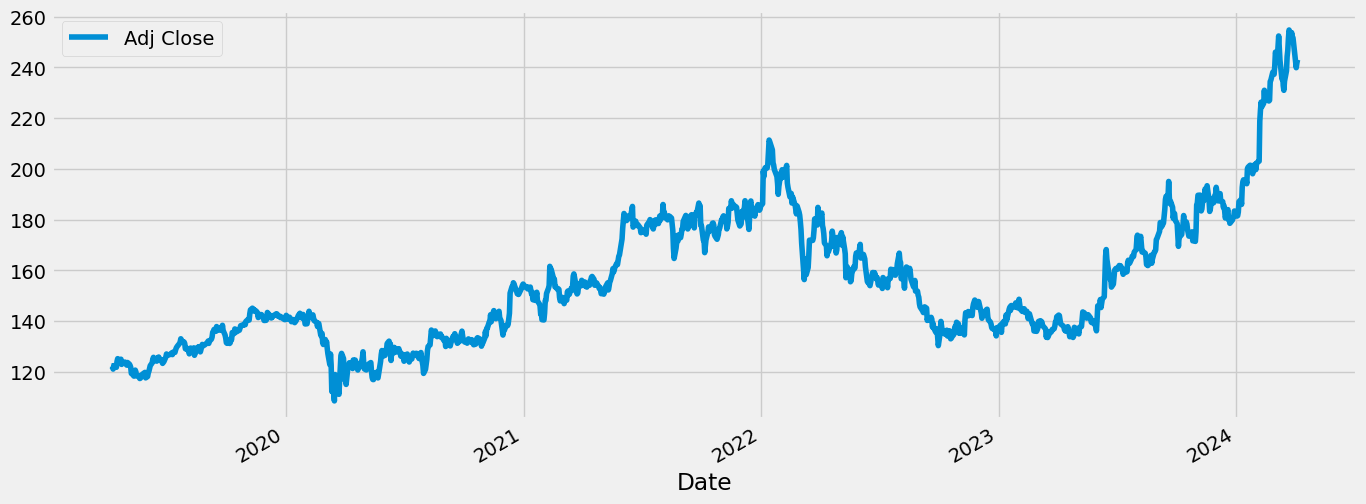

In [ ]:
data.plot(figsize=(15,6))

In [ ]:
stock_returns = np.log(1 + data.pct_change())
#stock_returns.tail()

Text(0, 0.5, 'Frequency')

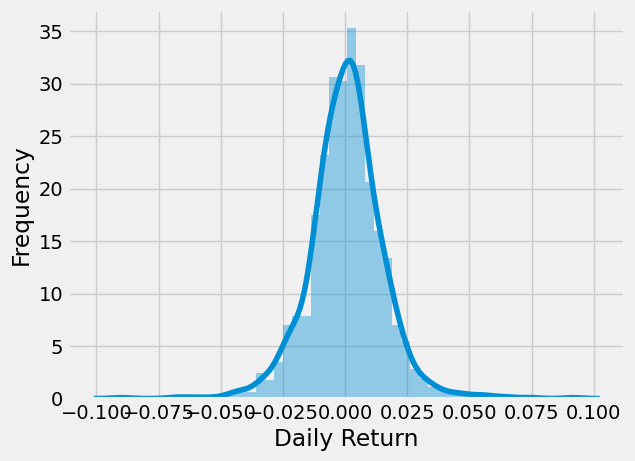

In [ ]:
sns.distplot(stock_returns.iloc[1:])
plt.xlabel("Daily Return")
plt.ylabel("Frequency")

<Axes: xlabel='Date'>

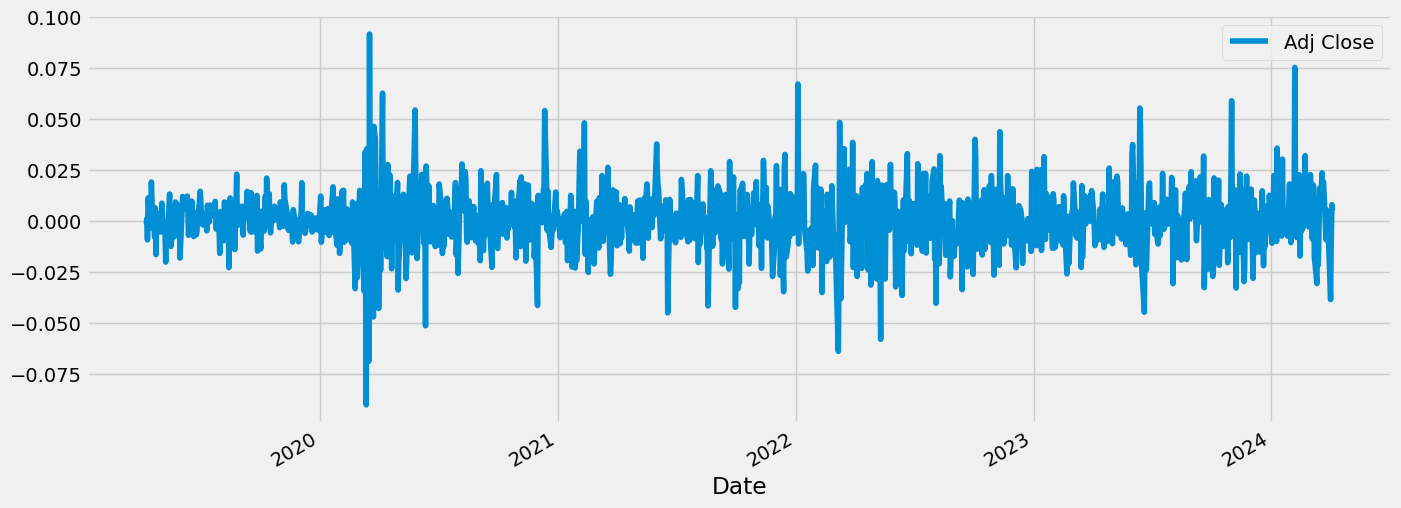

In [ ]:
stock_returns.plot(figsize=(15,6))

In [ ]:
u = stock_returns.mean()
var = stock_returns.var()

In [ ]:
drift = u - (0.5*var)
drift

Adj Close    0.000432
dtype: float64

In [ ]:
stddev = stock_returns.std()
stddev

Adj Close    0.015184
dtype: float64

In [ ]:
type(drift)
type(stddev)

pandas.core.series.Series

In [ ]:
np.array(drift)

array([0.00043183])

In [ ]:
drift.values

array([0.00043183])

In [ ]:
stddev.values

array([0.01518376])

In [ ]:
x = np.random.rand(10,2)
norm.ppf(x)

array([[-0.19724785,  0.11656148],
       [ 0.12599231, -1.35161974],
       [-0.47315326, -0.76591948],
       [ 1.06744186, -0.97161431],
       [ 0.77085307,  0.53951182],
       [ 1.47526495,  1.15293867],
       [-2.09262884, -0.18480228],
       [-2.01249661,  0.5736714 ],
       [-2.099729  ,  0.89376889],
       [-0.50831558,  1.40652741]])

In [ ]:
stdev = stock_returns.std()
days = 30
iterations = 100
Z = norm.ppf(np.random.rand(days, iterations))

In [ ]:
get_daily_returns = np.exp(drift.values + stdev.values * Z)

In [ ]:
S0 = data.iloc[-1]
S0

Adj Close    243.020004
Name: 2024-04-04 00:00:00, dtype: float64

In [ ]:
price_paths = np.zeros_like(get_daily_returns)

In [ ]:
price_paths.shape

(30, 100)

In [ ]:
price_paths[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
price_paths[0] = S0

In [ ]:
for t in range(1, days):
    price_paths[t] = price_paths[t-1]*get_daily_returns[t]

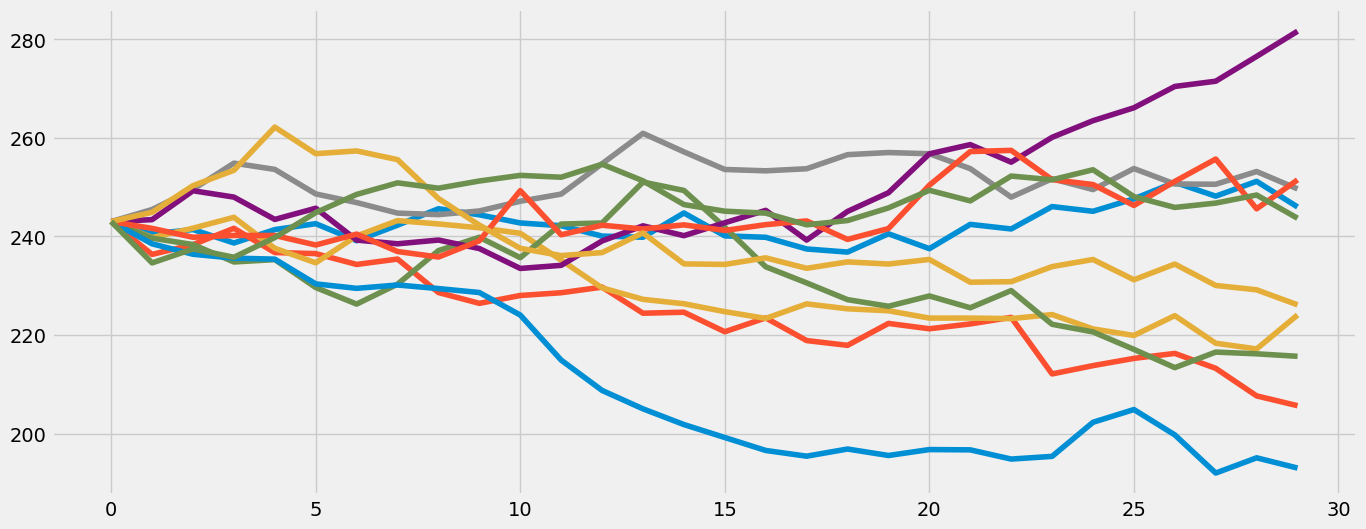

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(pd.DataFrame(price_paths).iloc[:,0:10])

Text(0, 0.5, 'Frequency')

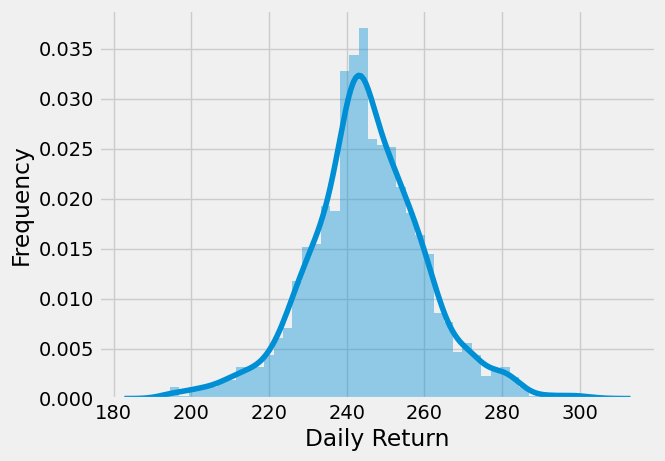

In [ ]:
sns.distplot(pd.DataFrame(price_paths).iloc[1:])
plt.xlabel("Daily Return")
plt.ylabel("Frequency")

In [ ]:

df1=pd.DataFrame(price_paths)
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,243.020004,243.020004,243.020004,243.020004,243.020004,243.020004,243.020004,243.020004,243.020004,243.020004,...,243.020004,243.020004,243.020004,243.020004,243.020004,243.020004,243.020004,243.020004,243.020004,243.020004
1,240.509717,236.355975,239.779966,239.647206,245.460272,243.407359,238.503112,241.630270,244.889883,234.634504,...,249.832280,247.200668,245.165623,238.555501,241.290286,244.248210,240.114229,240.939251,236.179794,238.291033
2,241.400788,238.345627,241.673661,238.358297,249.553441,249.271014,236.385803,239.834808,250.310086,237.459659,...,250.476156,248.813013,246.475273,243.757540,241.101411,244.841843,239.869797,243.795200,238.952798,242.861780
3,238.676146,241.649870,243.877174,234.825465,254.865352,247.980435,235.601621,240.203207,253.415683,235.778412,...,244.264202,249.306148,244.900480,246.128441,247.540333,243.433810,234.207418,246.928185,243.528538,243.148975
4,241.388142,236.734461,237.594928,235.300916,253.596228,243.452657,235.391998,240.192264,262.179704,239.771119,...,247.757615,257.651684,245.172706,243.530837,243.893753,237.875762,229.379909,243.485356,245.130974,243.656520


In [ ]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,243.020004,243.020004,243.020004,243.020004,243.020004,243.020004,243.020004,243.020004,243.020004,243.020004,...,243.020004,243.020004,243.020004,243.020004,243.020004,243.020004,243.020004,243.020004,243.020004,243.020004
1,240.509717,236.355975,239.779966,239.647206,245.460272,243.407359,238.503112,241.630270,244.889883,234.634504,...,249.832280,247.200668,245.165623,238.555501,241.290286,244.248210,240.114229,240.939251,236.179794,238.291033
2,241.400788,238.345627,241.673661,238.358297,249.553441,249.271014,236.385803,239.834808,250.310086,237.459659,...,250.476156,248.813013,246.475273,243.757540,241.101411,244.841843,239.869797,243.795200,238.952798,242.861780
3,238.676146,241.649870,243.877174,234.825465,254.865352,247.980435,235.601621,240.203207,253.415683,235.778412,...,244.264202,249.306148,244.900480,246.128441,247.540333,243.433810,234.207418,246.928185,243.528538,243.148975
4,241.388142,236.734461,237.594928,235.300916,253.596228,243.452657,235.391998,240.192264,262.179704,239.771119,...,247.757615,257.651684,245.172706,243.530837,243.893753,237.875762,229.379909,243.485356,245.130974,243.656520


In [ ]:
u1 = df1.mean()

In [ ]:
var1 =df1.var()

In [ ]:
u

Adj Close    0.000547
dtype: float64

In [ ]:
stock_returns1 = np.log(1 + df1.pct_change())
stock_returns1.tail()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
25,0.010244,0.006849,-0.005995,-0.016162,0.016935,0.009890,0.012686,-0.017077,-0.017618,-0.021716,...,0.006876,-0.013376,0.011609,0.004997,0.030490,-0.000151,-0.018779,-0.003742,-0.019201,0.004444
26,0.013422,0.004683,0.018124,-0.017199,-0.012418,0.016131,-0.025414,0.019616,0.013668,-0.008894,...,0.037877,0.000117,-0.001950,0.007385,-0.010967,-0.002917,-0.005014,-0.001538,0.028006,-0.003081
27,-0.011241,-0.014093,-0.025324,0.014668,-0.000210,0.003911,-0.039506,0.017872,-0.018676,0.003582,...,0.005637,0.011678,-0.019884,0.005963,0.017797,0.031821,0.001871,-0.015698,0.006193,0.009153
28,0.012048,-0.026555,-0.005317,-0.001629,0.010253,0.018366,0.015959,-0.040244,-0.003850,0.006618,...,0.005696,0.014239,-0.003255,-0.002040,-0.002789,0.026167,-0.013918,0.014380,0.016330,0.011145
29,-0.020910,-0.009628,0.031245,-0.002321,-0.013993,0.018297,-0.010696,0.023602,-0.013367,-0.019151,...,0.011957,0.014047,-0.018705,0.031351,0.014493,0.015907,0.003148,-0.010220,-0.015250,0.012281


In [ ]:
u1 = stock_returns1 .mean()
var =df1.var()
u1

0     0.000417
1    -0.005754
2    -0.002798
3    -0.004113
4     0.000928
        ...   
95    0.002739
96   -0.006570
97   -0.002083
98    0.001302
99    0.002421
Length: 100, dtype: float64

# Time Series Analysis

## SMA

In [ ]:
ticker ='TM'
df=pdr.get_data_yahoo(ticker, start='2019-04-08')
df.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-03-28,251.139999,252.850006,251.139999,251.679993,251.679993,124800
2024-04-01,242.850006,242.860001,240.220001,242.149994,242.149994,527900
2024-04-02,239.000000,240.240005,237.960007,239.889999,239.889999,296400
2024-04-03,239.500000,242.449997,239.500000,241.779999,241.779999,307400
2024-04-04,243.199997,243.665497,242.350006,243.020004,243.020004,83434


In [ ]:
df.index = pd.to_datetime(df.index)

In [ ]:
df.index = df.index.date

print(df.head())

                  Open        High         Low       Close   Adj Close  Volume
2019-04-08  121.730003  122.489998  121.730003  122.239998  122.239998   84600
2019-04-09  122.389999  122.800003  121.949997  122.059998  122.059998  104100
2019-04-10  122.440002  122.449997  122.040001  122.180000  122.180000   65400
2019-04-11  121.690002  121.830002  121.000000  121.040001  121.040001   96800
2019-04-12  121.839996  122.800003  121.839996  122.400002  122.400002  117100


In [ ]:
# drop unwanted columns
df.drop(['Open','High','Low','Adj Close', 'Volume'], axis=1, inplace=True)
df

,Close
2019-04-08,122.239998
2019-04-09,122.059998
2019-04-10,122.180000
2019-04-11,121.040001
2019-04-12,122.400002
...,...
2024-03-28,251.679993
2024-04-01,242.149994
2024-04-02,239.889999
2024-04-03,241.779999


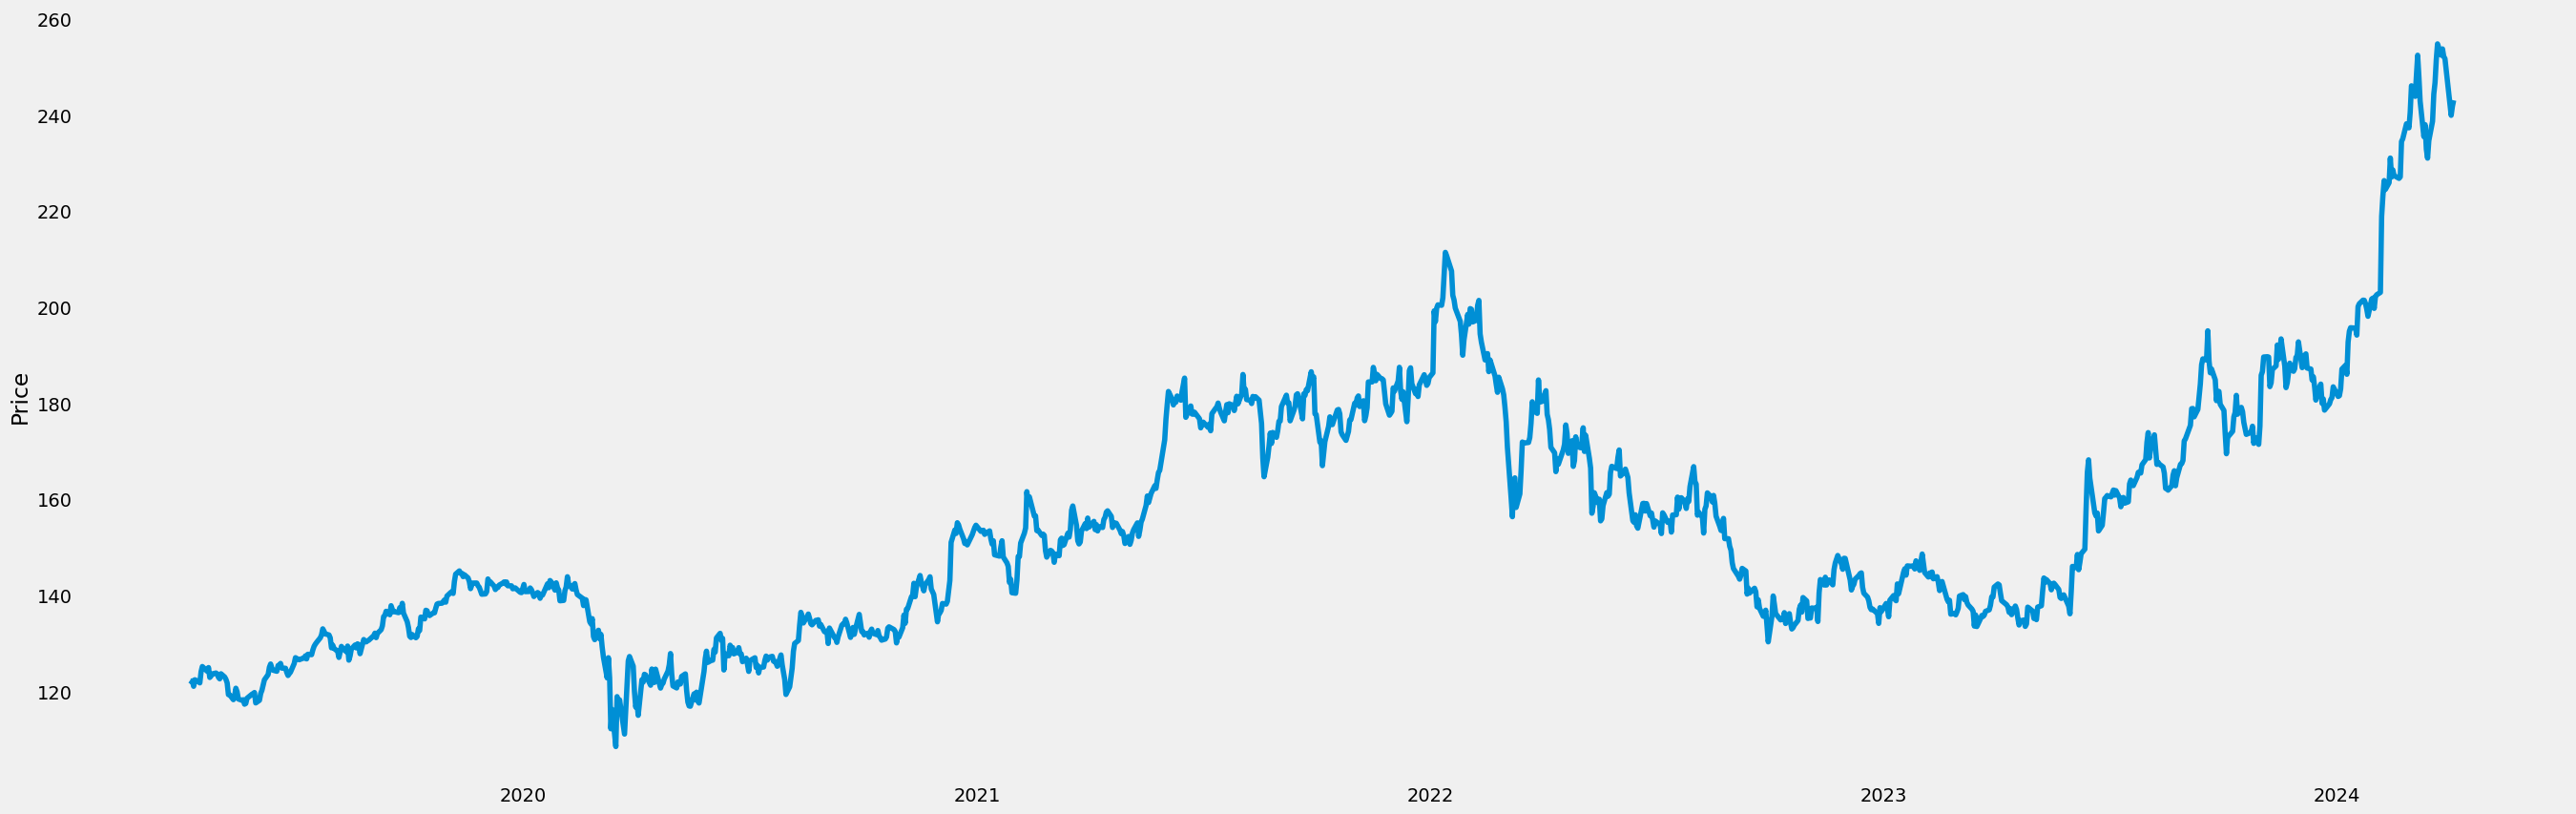

In [ ]:
df['Close'].plot(figsize = (30, 10))
plt.grid()
plt.ylabel("Price")
plt.show()

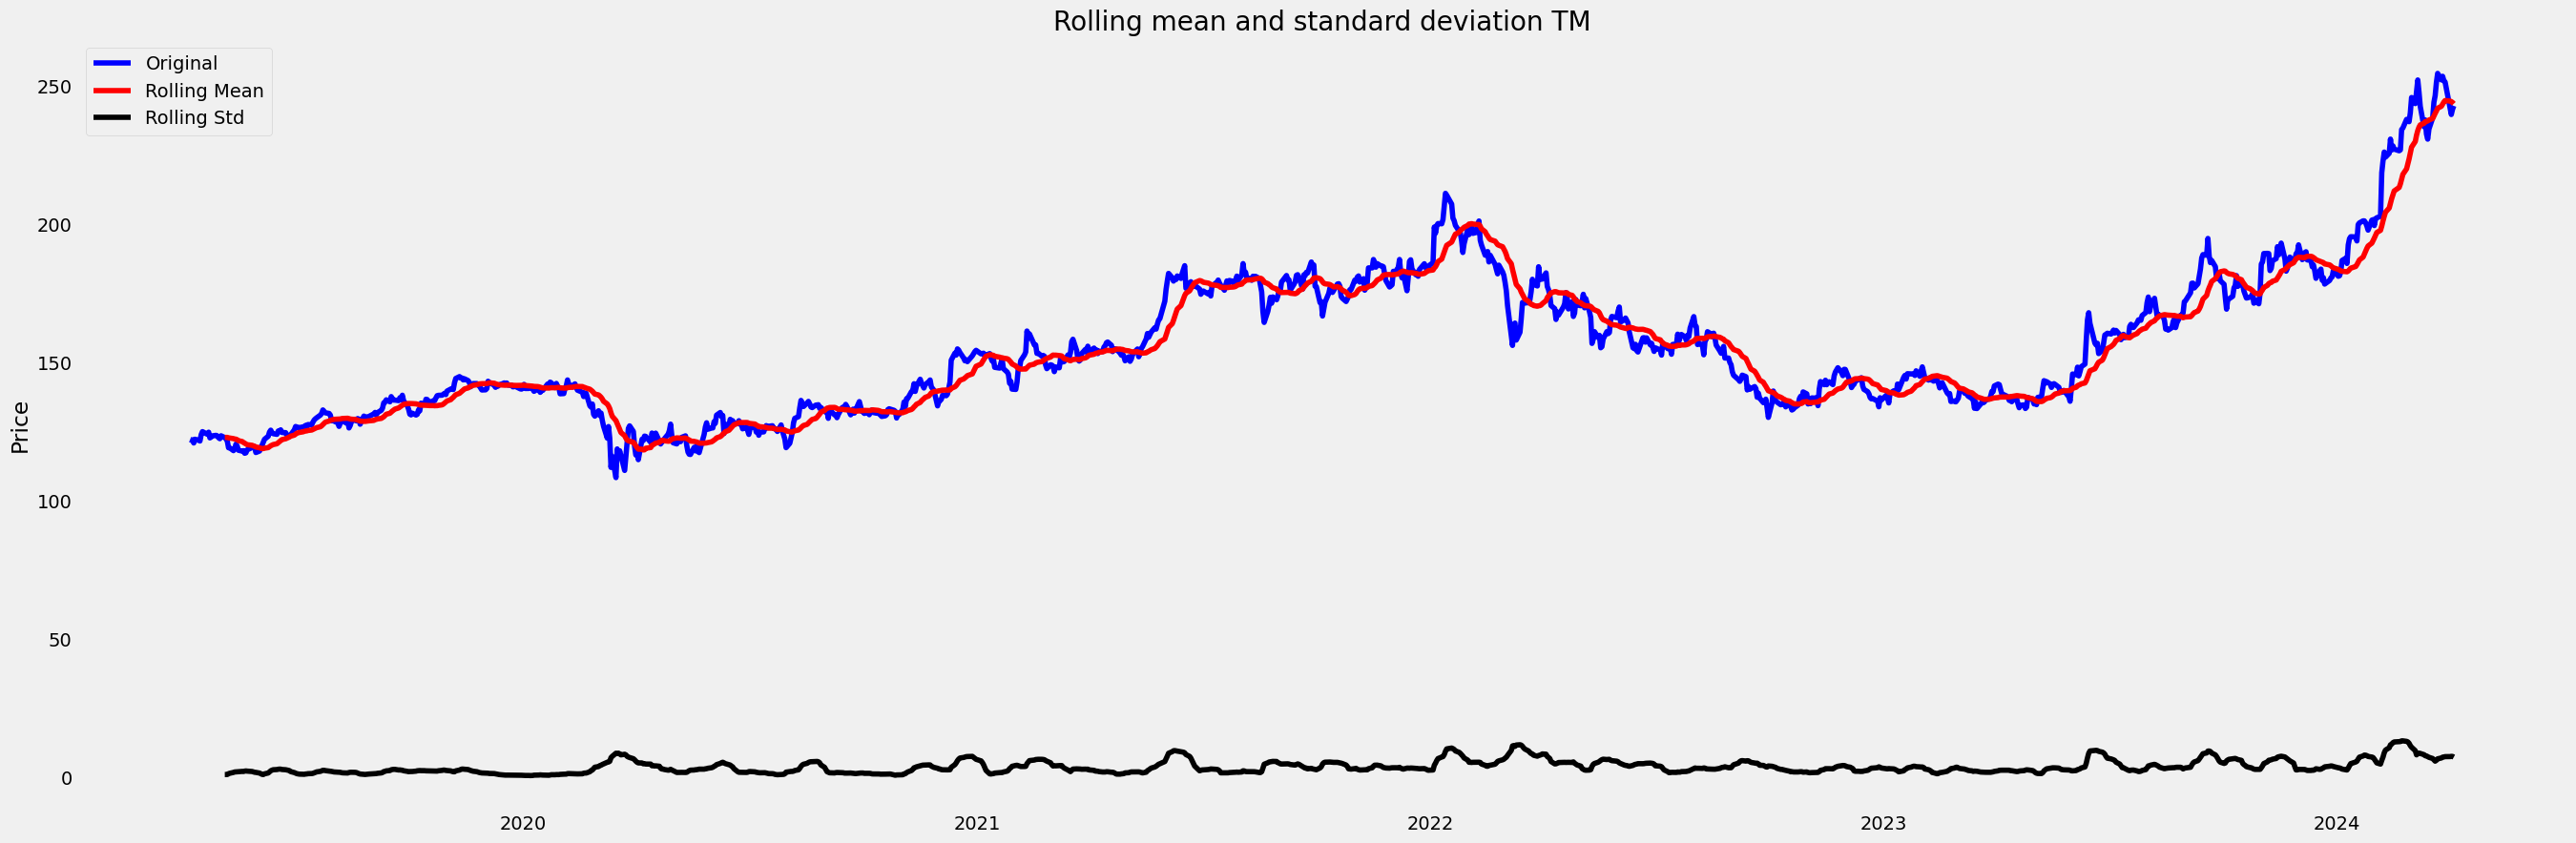

In [ ]:
rolling_mean = df['Close'].rolling(20).mean()
rolling_std = df['Close'].rolling(20).std()

plt.figure(figsize = (30, 10))
fig=plt.figure(1)

orig = plt.plot(df['Close'],color='blue',label='Original')
mean = plt.plot(rolling_mean,color='red',label='Rolling Mean')
std = plt.plot(rolling_std,color='black',label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling mean and standard deviation ' + 'TM')
plt.grid()
plt.ylabel("Price")
plt.show()

In [ ]:
df['SMA50'] = df['Close'].rolling(window = 20, min_periods = 1).mean()
df['SMA100'] = df['Close'].rolling(window = 50, min_periods = 1).mean()
df

,Close,SMA50,SMA100
2019-04-08,122.239998,122.239998,122.239998
2019-04-09,122.059998,122.149998,122.149998
2019-04-10,122.180000,122.159999,122.159999
2019-04-11,121.040001,121.879999,121.879999
2019-04-12,122.400002,121.984000,121.984000
...,...,...,...
2024-03-28,251.679993,244.948500,228.432599
2024-04-01,242.149994,244.754000,229.273999
2024-04-02,239.889999,244.556500,230.058399
2024-04-03,241.779999,244.236000,230.865599


In [ ]:
df['Signal'] = 0.0
df['Signal'] = np.where(df['SMA50'] > df['SMA100'], 1.0, 0.0)

In [ ]:
df['Position'] = df['Signal'].diff()
# display first few rows
df.head()

,Close,SMA50,SMA100,Signal,Position
2019-04-08,122.239998,122.239998,122.239998,0.0,NaN
2019-04-09,122.059998,122.149998,122.149998,0.0,0.0
2019-04-10,122.180000,122.159999,122.159999,0.0,0.0
2019-04-11,121.040001,121.879999,121.879999,0.0,0.0
2019-04-12,122.400002,121.984000,121.984000,0.0,0.0


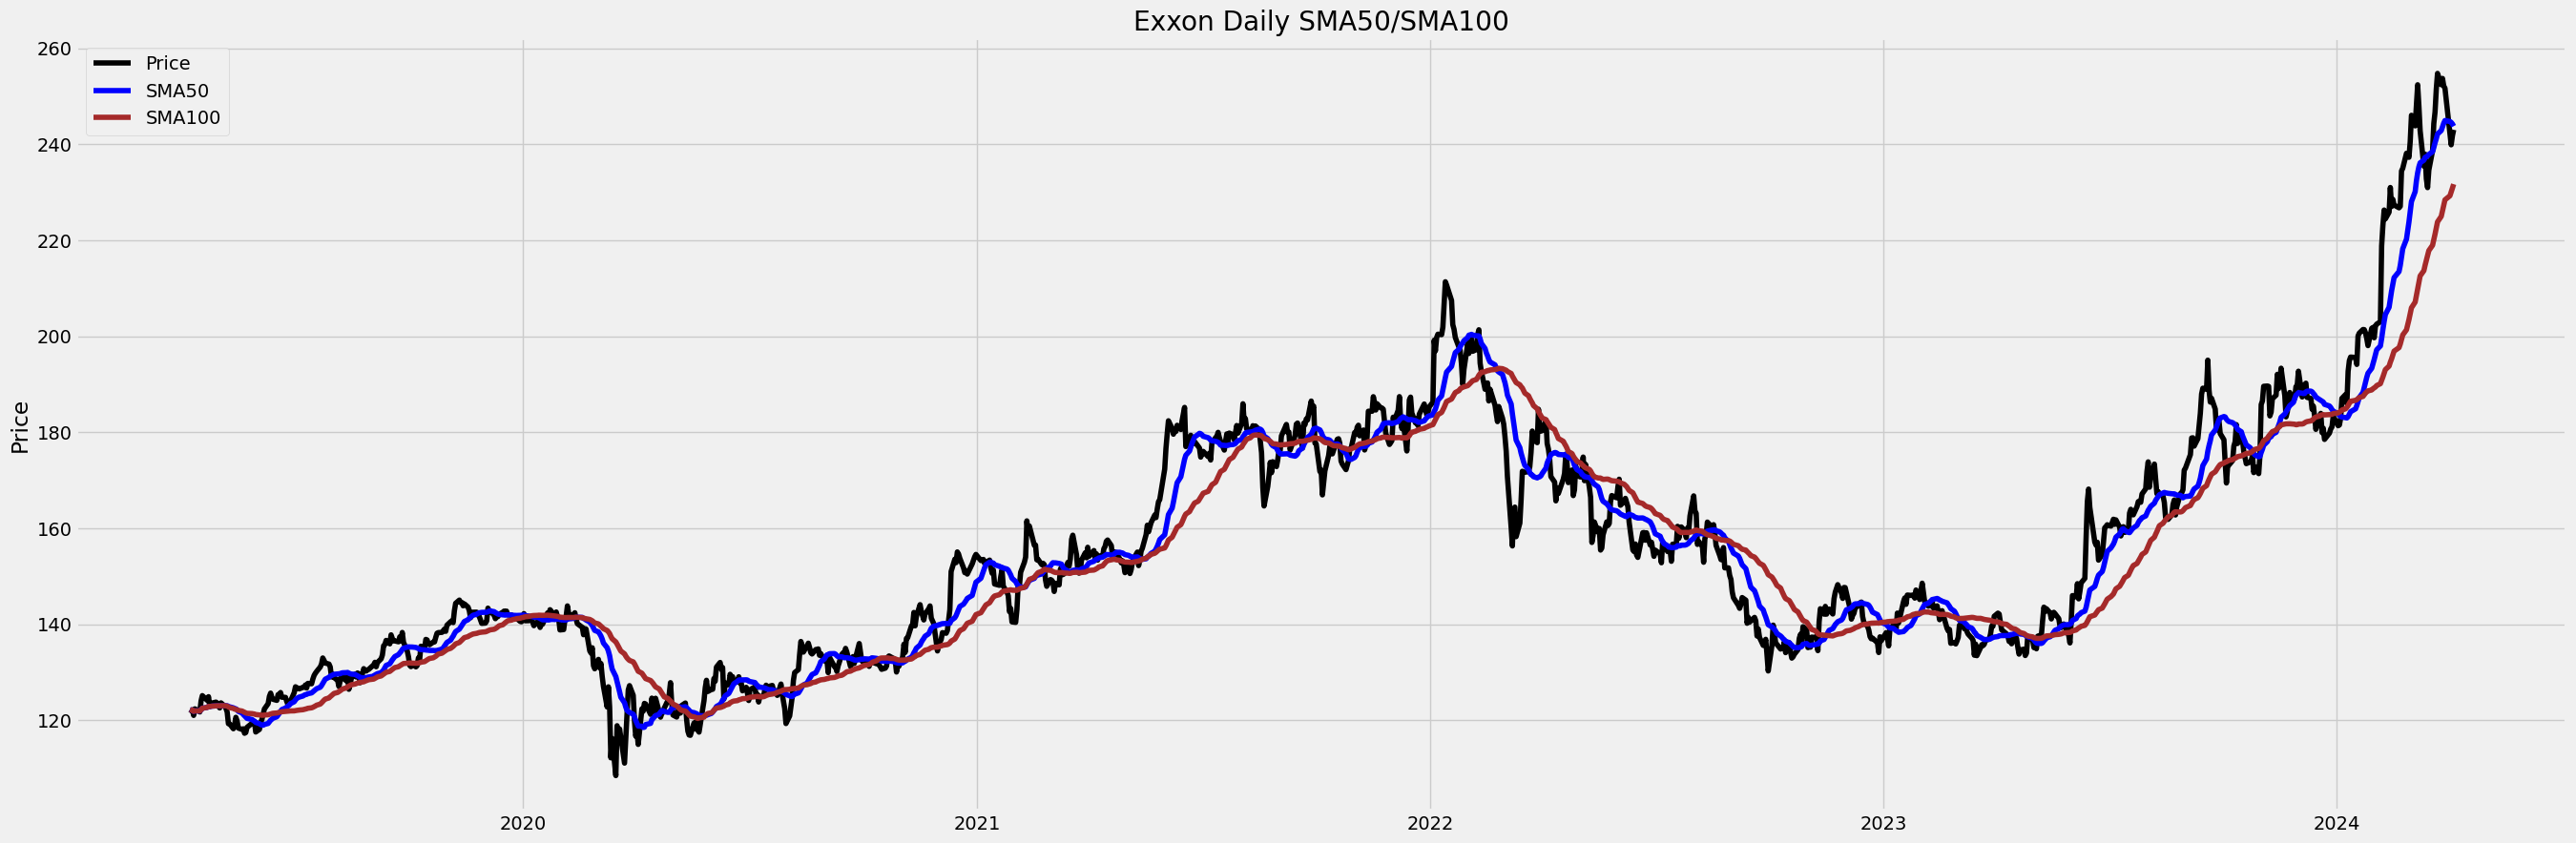

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(df["Close"], color="BLACK", label="Price")
plt.plot(df["SMA50"], color="BLUE", label="SMA50")
plt.plot(df["SMA100"], color="BROWN", label="SMA100")
plt.ylabel("Price")
plt.title("Exxon Daily SMA50/SMA100")
plt.legend()
plt.show()

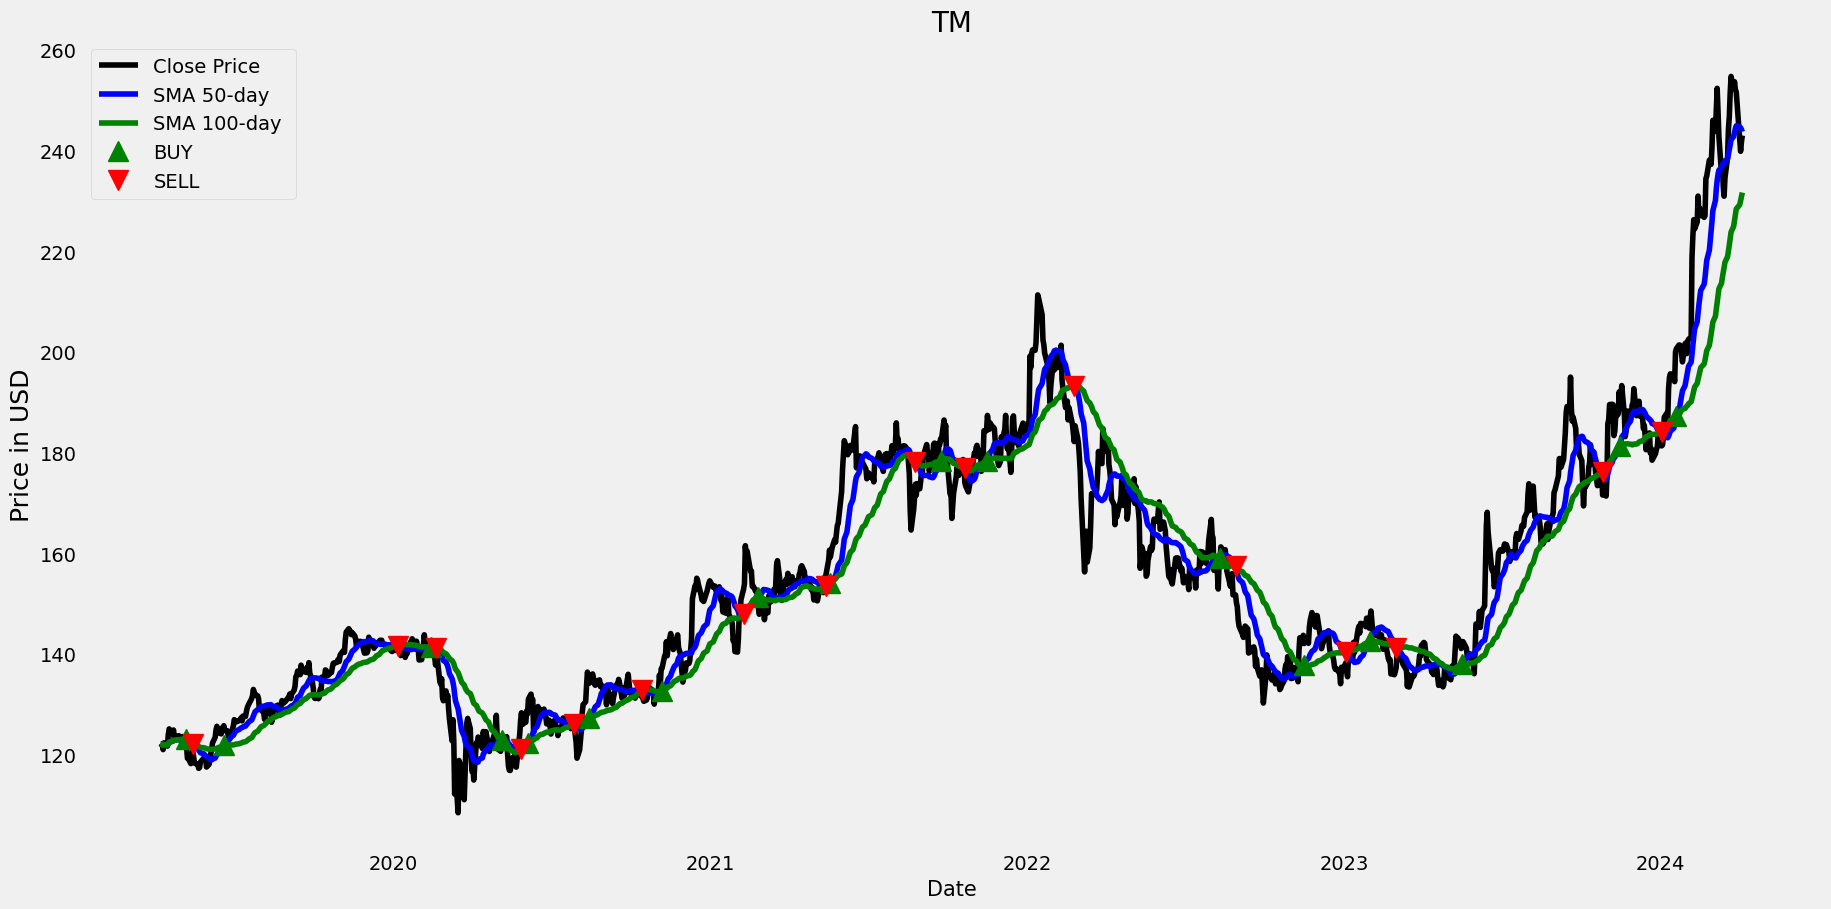

In [ ]:
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages
df['Close'].plot(color = 'k', label= 'Close Price')
df['SMA50'].plot(color = 'b',label = 'SMA 50-day ')
df['SMA100'].plot(color = 'g', label = 'SMA 100-day ')
# plot ‘buy’ signals
plt.plot(df[df['Position'] == 1].index,
         df['SMA50'][df['Position'] == 1],
         '^', markersize = 15, color = 'g', label = 'BUY')
# plot ‘sell’ signals
plt.plot(df[df['Position'] == -1].index,
         df['SMA100'][df['Position'] == -1],
         'v', markersize = 15, color = 'r', label = 'SELL')
plt.ylabel('Price in USD', fontsize = 18 )
plt.xlabel('Date', fontsize = 15 )
plt.title(ticker, fontsize = 20)
plt.legend()
plt.grid()
plt.show()

In [ ]:
df_position = df[(df['Position'] == 1) | (df['Position'] == -1)]
df_position['Position'] = df_position['Position'].apply(lambda x: 'Buy' if x == 1 else 'Sell')
print(tabulate(df_position, headers = 'keys', tablefmt = 'psql'))

+------------+---------+---------+----------+----------+------------+
|            |   Close |   SMA50 |   SMA100 |   Signal | Position   |
|------------+---------+---------+----------+----------+------------|
| 2019-05-07 |  122.5  | 123.074 |  123.034 |        1 | Buy        |
| 2019-05-16 |  119.9  | 122.211 |  122.212 |        0 | Sell       |
| 2019-06-20 |  125.8  | 121.889 |  121.75  |        1 | Buy        |
| 2020-01-07 |  141.51 | 141.667 |  141.722 |        0 | Sell       |
| 2020-02-14 |  140.15 | 141.488 |  141.477 |        1 | Buy        |
| 2020-02-19 |  137.84 | 141.228 |  141.298 |        0 | Sell       |
| 2020-05-05 |  121.96 | 122.857 |  122.777 |        1 | Buy        |
| 2020-05-28 |  128.36 | 121.063 |  121.225 |        0 | Sell       |
| 2020-06-04 |  128.16 | 122.407 |  122.377 |        1 | Buy        |
| 2020-07-27 |  127.57 | 126.001 |  126.076 |        0 | Sell       |
| 2020-08-14 |  134.22 | 127.365 |  127.352 |        1 | Buy        |
| 2020-10-14 |  131.

# Bollinger Bands
   #####  movement of price and volatility over the time

In [ ]:
def bb(data, sma, window):
    std = data.rolling(window = window).std()
    upper_bb = sma + std * 2
    lower_bb = sma - std * 2
    return upper_bb, lower_bb

df['upper_bb'], df['lower_bb'] = bb(df['Close'], df['SMA50'], 20)
df.tail()

,Close,SMA50,SMA100,Signal,Position,upper_bb,lower_bb
2024-03-28,251.679993,244.948500,228.432599,1.0,0.0,260.040257,229.856743
2024-04-01,242.149994,244.754000,229.273999,1.0,0.0,259.886739,229.621261
2024-04-02,239.889999,244.556500,230.058399,1.0,0.0,259.841801,229.271199
2024-04-03,241.779999,244.236000,230.865599,1.0,0.0,259.469234,229.002766
2024-04-04,243.020004,243.767001,231.698000,1.0,0.0,258.511654,229.022347


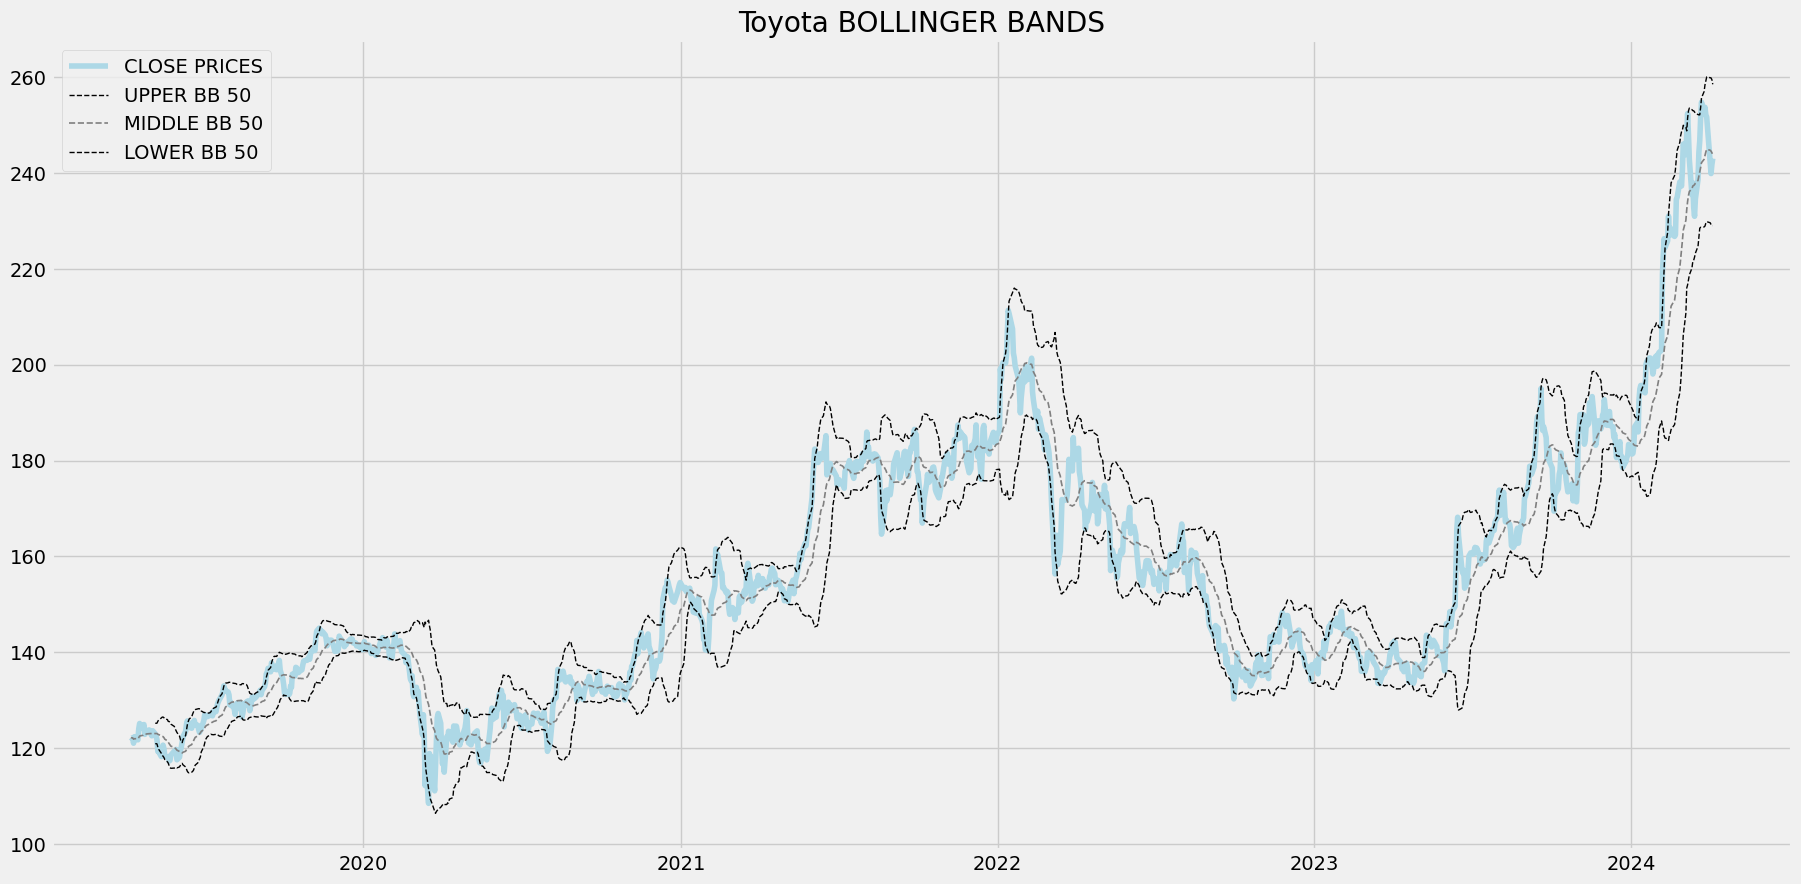

In [ ]:
plt.figure(figsize = (20,10))
df['Close'].plot(label = 'CLOSE PRICES', color = 'lightblue')
df['upper_bb'].plot(label = 'UPPER BB 50', linestyle = '--', linewidth = 1, color = 'black')
df['SMA50'].plot(label = 'MIDDLE BB 50', linestyle = '--', linewidth = 1.2, color = 'grey')
df['lower_bb'].plot(label = 'LOWER BB 50', linestyle = '--', linewidth = 1, color = 'black')
plt.legend(loc = 'upper left')
plt.title('Toyota BOLLINGER BANDS')
plt.show()

In [ ]:
def implement_bb_strategy(data, lower_bb, upper_bb):
    buy_price = []
    sell_price = []
    bb_signal = []
    signal = 0

    for i in range(len(data)):
        if data[i-1] > lower_bb[i-1] and data[i] < lower_bb[i]:
            if signal != 1:
                buy_price.append(data[i])
                sell_price.append(np.nan)
                signal = 1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
        elif data[i-1] < upper_bb[i-1] and data[i] > upper_bb[i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(data[i])
                signal = -1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            bb_signal.append(0)

    return buy_price, sell_price, bb_signal

buy_price, sell_price, bb_signal = implement_bb_strategy(df['Close'], df['lower_bb'], df['upper_bb'])


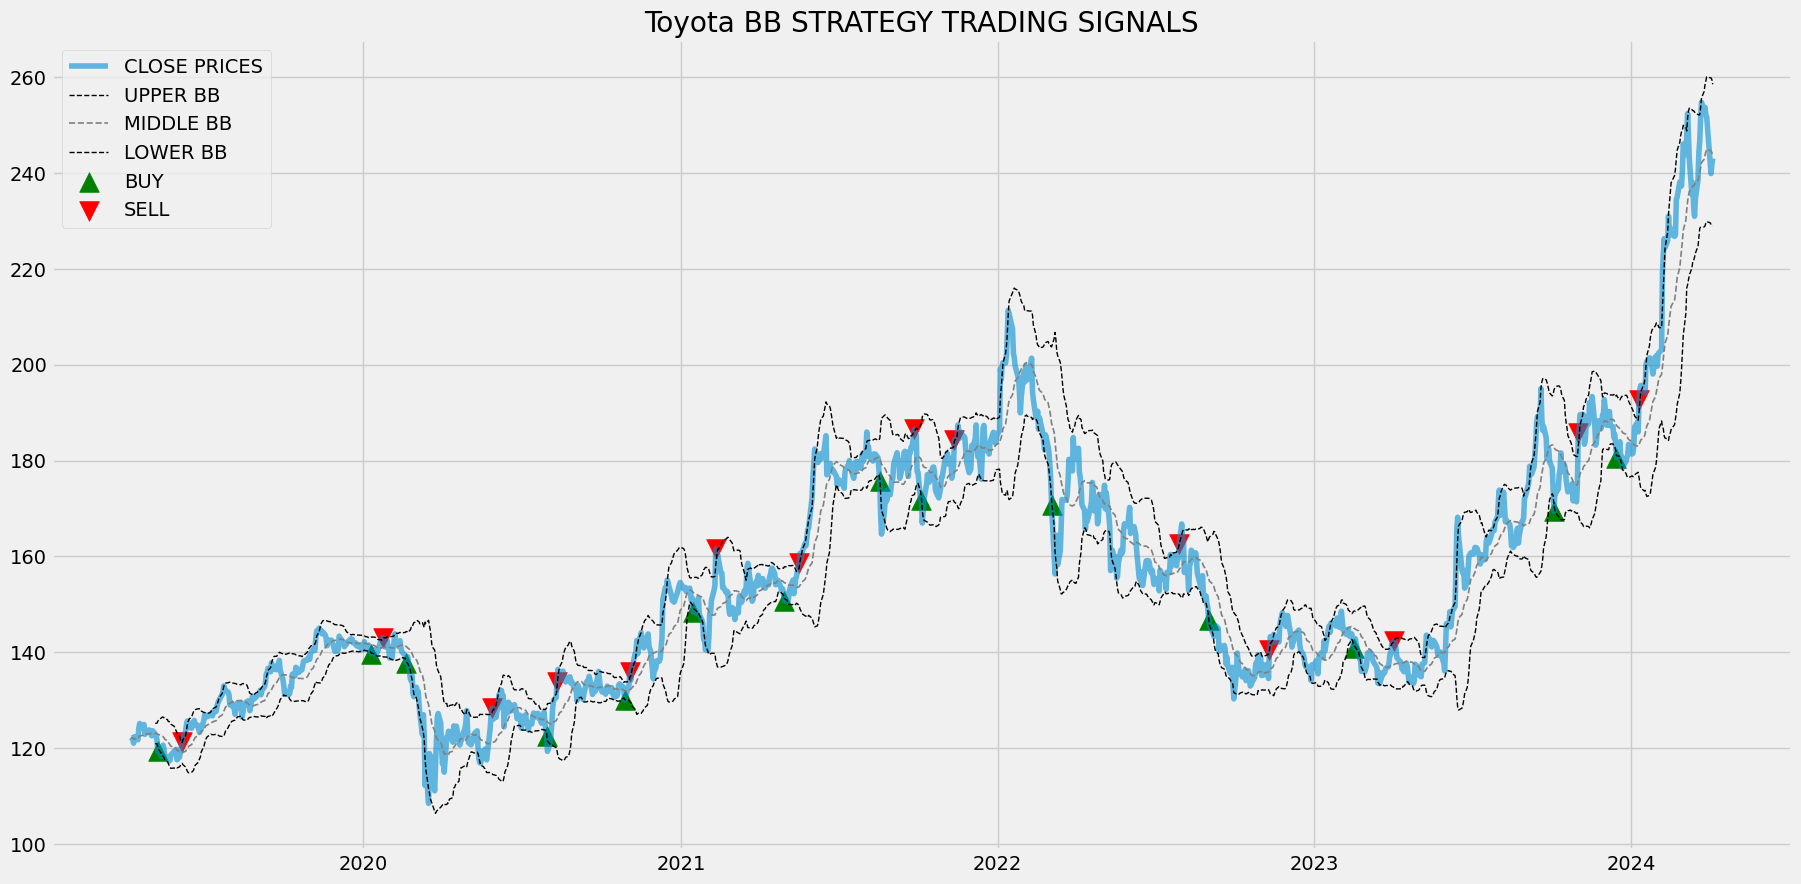

In [ ]:
plt.figure(figsize = (20,10))
df['Close'].plot(label = 'CLOSE PRICES', alpha = 0.6)
df['upper_bb'].plot(label = 'UPPER BB', linestyle = '--', linewidth = 1, color = 'black')
df['SMA50'].plot(label = 'MIDDLE BB', linestyle = '--', linewidth = 1.2, color = 'grey')
df['lower_bb'].plot(label = 'LOWER BB', linestyle = '--', linewidth = 1, color = 'black')
plt.scatter(df.index, buy_price, marker = '^', color = 'green', label = 'BUY', s = 200)
plt.scatter(df.index, sell_price, marker = 'v', color = 'red', label = 'SELL', s = 200)
plt.title('Toyota BB STRATEGY TRADING SIGNALS')
plt.legend(loc = 'upper left')
plt.show()

# Forecasting

In [ ]:
ticker ='TM'
df=pdr.get_data_yahoo(ticker, start='2019-4-8')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
#df.index = pd.to_datetime(df.index)

In [ ]:
df.index = df.index.date
df.index.name = 'Date'
df.reset_index()
print(df.head())

                  Open        High         Low       Close   Adj Close  Volume
Date                                                                          
2019-04-08  121.730003  122.489998  121.730003  122.239998  122.239998   84600
2019-04-09  122.389999  122.800003  121.949997  122.059998  122.059998  104100
2019-04-10  122.440002  122.449997  122.040001  122.180000  122.180000   65400
2019-04-11  121.690002  121.830002  121.000000  121.040001  121.040001   96800
2019-04-12  121.839996  122.800003  121.839996  122.400002  122.400002  117100


In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-08,121.730003,122.489998,121.730003,122.239998,122.239998,84600
2019-04-09,122.389999,122.800003,121.949997,122.059998,122.059998,104100
2019-04-10,122.440002,122.449997,122.040001,122.180000,122.180000,65400
2019-04-11,121.690002,121.830002,121.000000,121.040001,121.040001,96800
2019-04-12,121.839996,122.800003,121.839996,122.400002,122.400002,117100
...,...,...,...,...,...,...
2024-03-28,251.139999,252.850006,251.139999,251.679993,251.679993,124800
2024-04-01,242.850006,242.860001,240.220001,242.149994,242.149994,527900
2024-04-02,239.000000,240.240005,237.960007,239.889999,239.889999,296400


In [ ]:
print (f"start date : {str(df.index.min())}")
print (f"end date : {str(df.index.max())}")

start date : 2019-04-08
end date : 2024-04-04


In [ ]:
df=df.reset_index()
df[['ds','y']]= df[['Date','Close']]

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,ds,y
0,2019-04-08,121.730003,122.489998,121.730003,122.239998,122.239998,84600,2019-04-08,122.239998
1,2019-04-09,122.389999,122.800003,121.949997,122.059998,122.059998,104100,2019-04-09,122.059998
2,2019-04-10,122.440002,122.449997,122.040001,122.180000,122.180000,65400,2019-04-10,122.180000
3,2019-04-11,121.690002,121.830002,121.000000,121.040001,121.040001,96800,2019-04-11,121.040001
4,2019-04-12,121.839996,122.800003,121.839996,122.400002,122.400002,117100,2019-04-12,122.400002
...,...,...,...,...,...,...,...,...,...
1252,2024-03-28,251.139999,252.850006,251.139999,251.679993,251.679993,124800,2024-03-28,251.679993
1253,2024-04-01,242.850006,242.860001,240.220001,242.149994,242.149994,527900,2024-04-01,242.149994
1254,2024-04-02,239.000000,240.240005,237.960007,239.889999,239.889999,296400,2024-04-02,239.889999
1255,2024-04-03,239.500000,242.449997,239.500000,241.779999,241.779999,307400,2024-04-03,241.779999


In [ ]:
ph_df=df.drop(['Date','High','Low','Open','Close','Volume','Adj Close'], axis=1)

In [ ]:
ph_df.head()

,ds,y
0,2019-04-08,122.239998
1,2019-04-09,122.059998
2,2019-04-10,122.180000
3,2019-04-11,121.040001
4,2019-04-12,122.400002


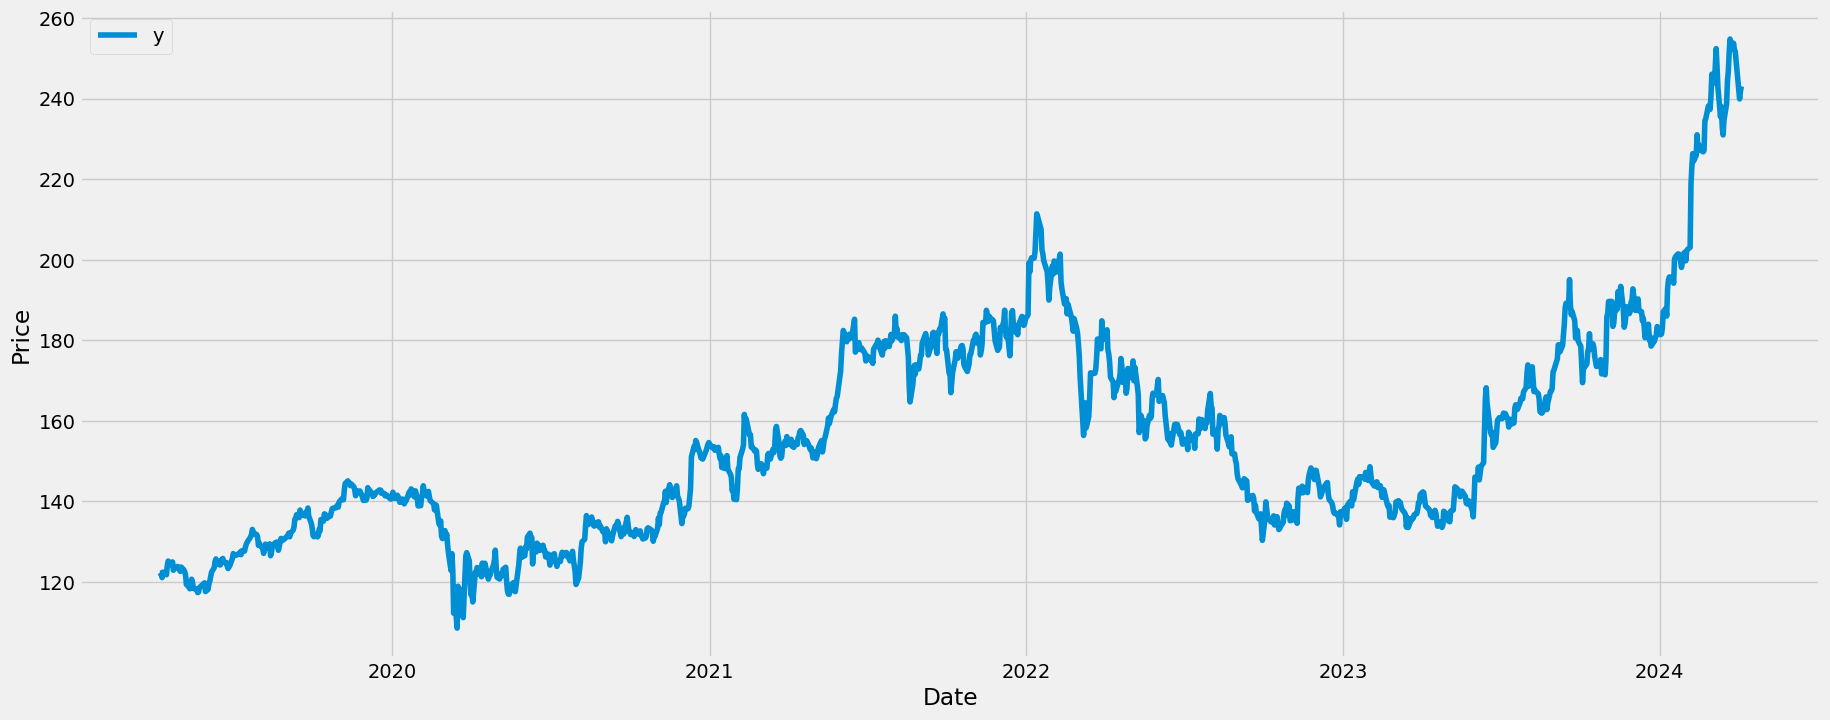

In [ ]:
ax = ph_df.set_index('ds').plot(figsize=(20, 8))
ax.set_ylabel('Price')
ax.set_xlabel('Date')

plt.show()

In [ ]:
import plotly.express as px
fig = go.Figure([go.Scatter(x=ph_df['ds'], y=ph_df['y'])])
fig.update_layout(title_text="Actual Prices")
fig.update_xaxes(title_text="Timeline")
fig.update_yaxes(title_text="Price")
fig.show()

In [ ]:
model = Prophet(daily_seasonality=True)
model.fit(ph_df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpicjddlor/elnq5u0h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpicjddlor/84p0uqd4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68360', 'data', 'file=/tmp/tmpicjddlor/elnq5u0h.json', 'init=/tmp/tmpicjddlor/84p0uqd4.json', 'output', 'file=/tmp/tmpicjddlor/prophet_model845kcj8x/prophet_model-20240404171507.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:15:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:15:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future=model.make_future_dataframe(periods=365,freq='D')

In [ ]:
predictions=model.predict(future)

In [ ]:
predictions.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1617,2025-03-31,324.513190,283.065908,367.665323,283.423007,366.055573,2.098394,2.098394,2.098394,-2.06487,...,-0.201634,-0.201634,-0.201634,4.364899,4.364899,4.364899,0.0,0.0,0.0,326.611584
1618,2025-04-01,324.773309,284.425513,369.523060,283.562508,366.415862,2.104950,2.104950,2.104950,-2.06487,...,-0.064974,-0.064974,-0.064974,4.234794,4.234794,4.234794,0.0,0.0,0.0,326.878260
1619,2025-04-02,325.033429,285.515687,369.476872,283.731202,366.657941,1.980508,1.980508,1.980508,-2.06487,...,-0.008346,-0.008346,-0.008346,4.053724,4.053724,4.053724,0.0,0.0,0.0,327.013937
1620,2025-04-03,325.293549,284.016866,369.473627,283.848107,367.176599,1.735953,1.735953,1.735953,-2.06487,...,-0.024728,-0.024728,-0.024728,3.825551,3.825551,3.825551,0.0,0.0,0.0,327.029502
1621,2025-04-04,325.553669,284.858147,368.679120,283.979325,367.643096,1.273761,1.273761,1.273761,-2.06487,...,-0.216535,-0.216535,-0.216535,3.555166,3.555166,3.555166,0.0,0.0,0.0,326.827430


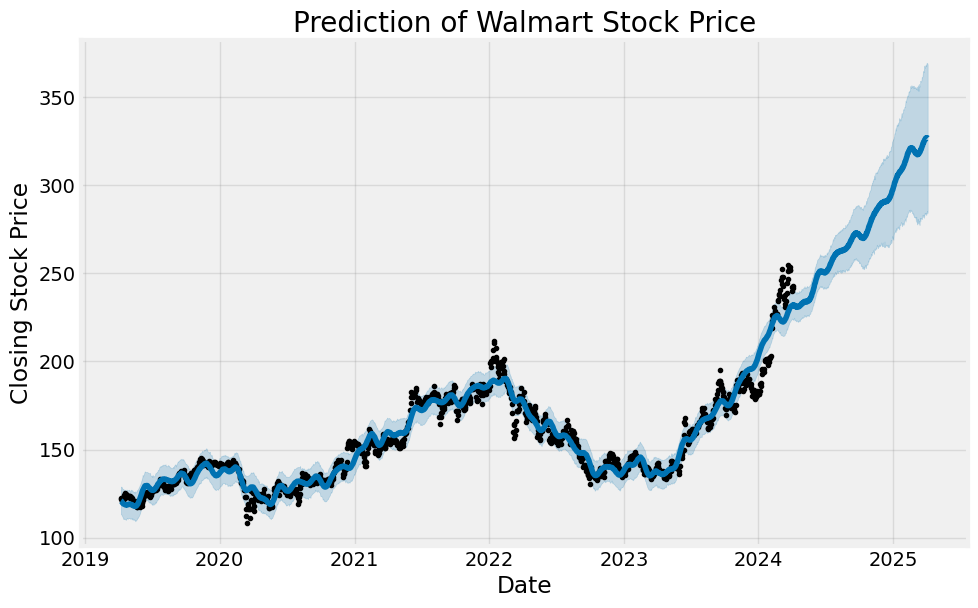

,ds,yhat,yhat_lower,yhat_upper
1617,2025-03-31,326.611584,283.065908,367.665323
1618,2025-04-01,326.878260,284.425513,369.523060
1619,2025-04-02,327.013937,285.515687,369.476872
1620,2025-04-03,327.029502,284.016866,369.473627
1621,2025-04-04,326.827430,284.858147,368.679120


In [ ]:
model.plot(predictions)
plt.title("Prediction of Toyota Stock Price")
plt.xlabel("Date")
plt.ylabel("Closing Stock Price")
plt.show()
predictions[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

The given dataset appears to contain predictions of Walmart's stock prices on different dates in April 2024. The 'ds' column contains the date of each prediction, while the 'yhat', 'yhat_lower', and 'yhat_upper' columns represent the predicted stock price, lower bound, and upper bound of the predicted stock price, respectively.

Based on the analysis of the dataset, the model predicts that Walmart's stock price will gradually increase over the course of April 2024. Specifically, the predicted stock price is $176.88 on April 1st, $177.56 on April 2nd, $177.76 on April 3rd, $178.23 on April 4th, and $178.91 on April 5th. However, it's important to keep in mind that stock prices are highly volatile and are
influenced by numerous external factors, which means that the accuracy of these predictions is uncertain.

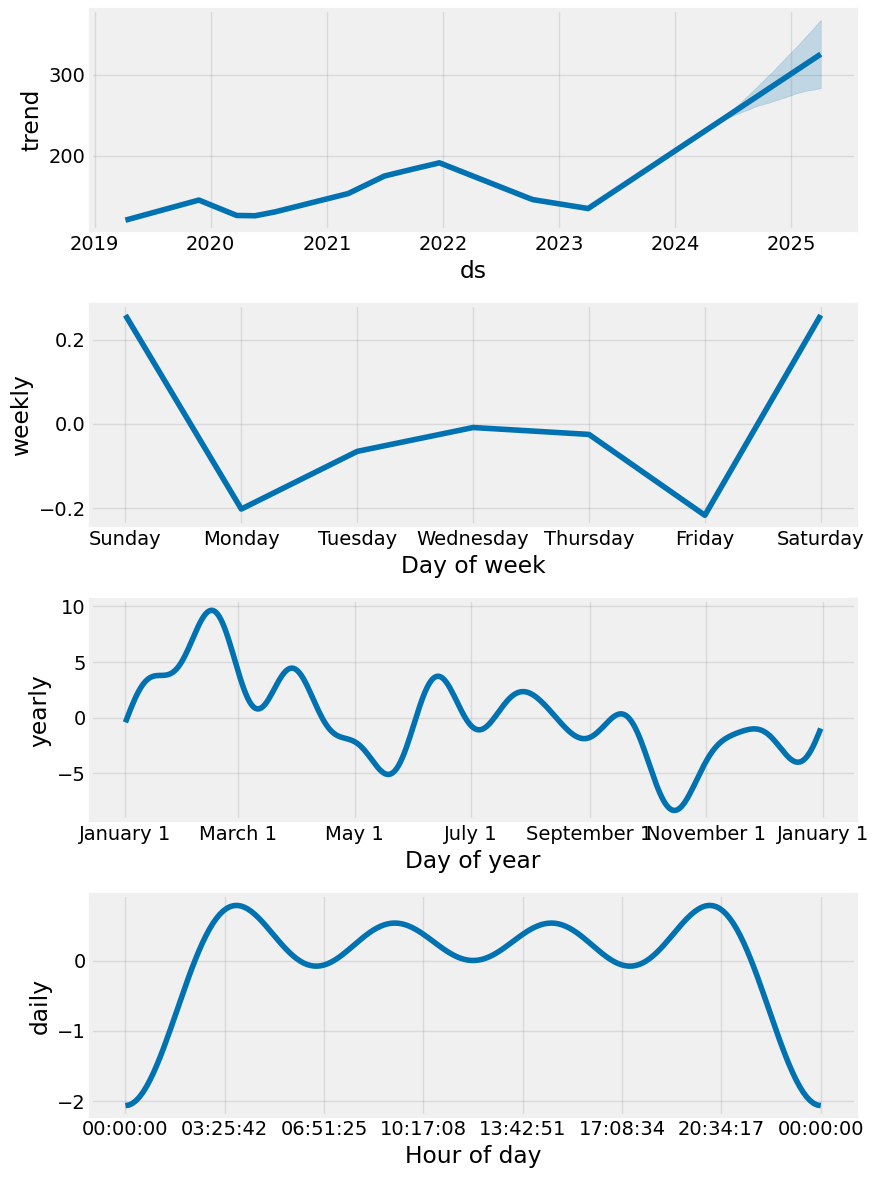

In [ ]:
model.plot_components(predictions)
plt.show()

In [ ]:
from prophet.plot import plot_plotly
plot_plotly(model,predictions)